<a href="https://colab.research.google.com/github/SohamValkyrie/ML_Theory_DA_Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the libraries

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

## Define start day to fetch the dataset from the yahoo finance library

In [2]:
START = "1995-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df = data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,1995-01-03 00:00:00+00:00,0.285766,0.342634,0.347098,0.338170,0.347098,103868800
1,1995-01-04 00:00:00+00:00,0.293213,0.351563,0.353795,0.344866,0.344866,158681600
2,1995-01-05 00:00:00+00:00,0.289489,0.347098,0.351563,0.345982,0.350446,73640000
3,1995-01-06 00:00:00+00:00,0.312760,0.375000,0.385045,0.367188,0.371652,1076622400
4,1995-01-09 00:00:00+00:00,0.306826,0.367885,0.373884,0.366071,0.371652,274086400


In [4]:
df.shape

(7522, 7)

### Adding missing values randomly for data-preprocessing

In [19]:
# Step 1: Add Random Missing Values
np.random.seed(42)  # For reproducibility
missing_indices = np.random.choice(df.index, size=700, replace=False)
df.loc[missing_indices, 'Close'] = np.nan

### Data Preprocessing To fill Missing Values

In [21]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

# List of columns to apply forward and backward fill
price_columns = ['Close', 'Adj Close', 'High', 'Low', 'Open']

# Fill missing values for price columns using forward and backward fill
for col in price_columns:
    if col in df.columns:  # Check if the column exists to avoid KeyError
        df[col] = df[col].ffill().bfill()

# Fill 'Volume' with 0 if it exists in the DataFrame
if 'Volume' in df.columns:
    df['Volume'] = df['Volume'].fillna(0)

# Fill 'Ticker' if it exists
if 'Ticker' in df.columns:
    df['Ticker'] = df['Ticker'].ffill().bfill()


In [23]:
#check for null values after processing
df.isnull().sum()

,,0
Price,Ticker,
Date,,0
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


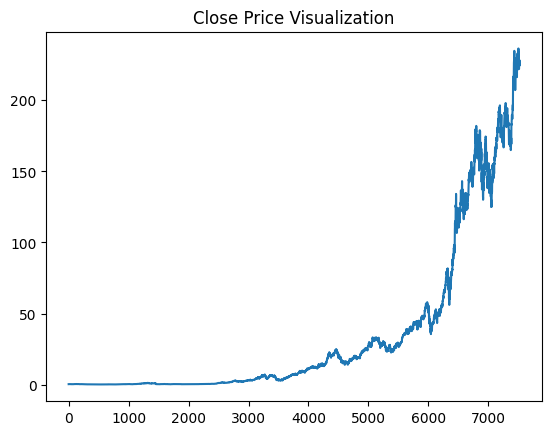

In [24]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [25]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,1995-01-03 00:00:00+00:00,0.285766,0.342634,0.347098,0.338170,0.347098,103868800
1,1995-01-04 00:00:00+00:00,0.293213,0.351563,0.353795,0.344866,0.344866,158681600
2,1995-01-05 00:00:00+00:00,0.289489,0.347098,0.351563,0.345982,0.350446,73640000
3,1995-01-06 00:00:00+00:00,0.312760,0.375000,0.385045,0.367188,0.371652,1076622400
4,1995-01-09 00:00:00+00:00,0.306826,0.367885,0.373884,0.366071,0.371652,274086400
...,...,...,...,...,...,...,...
7517,2024-11-11 00:00:00+00:00,224.229996,224.229996,225.699997,221.500000,225.000000,42005600
7518,2024-11-12 00:00:00+00:00,224.229996,224.229996,225.589996,223.360001,224.550003,40398300
7519,2024-11-13 00:00:00+00:00,225.119995,225.119995,226.649994,222.759995,224.009995,48566200


## Plotting moving averages of 100 days

In [26]:
mav100 = df.Close.rolling(100).mean()
mav100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7517,224.1010
7518,224.2684
7519,224.4382
7520,224.6297


Text(0.5, 1.0, 'Moving Averages Of 100 Days')

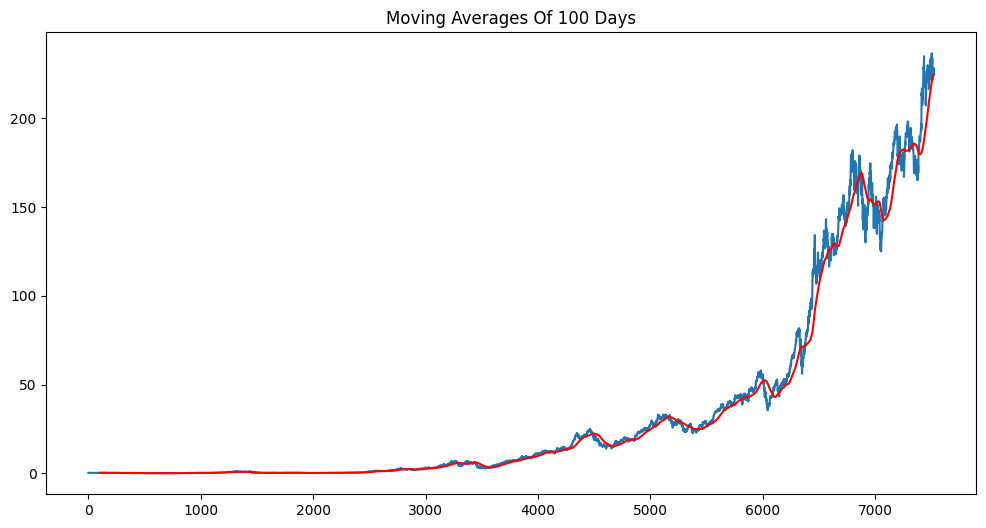

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mav100, 'r')
plt.title('Moving Averages Of 100 Days')

## Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

In [28]:
mav200 = df.Close.rolling(200).mean()
mav200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7517,202.9885
7518,203.1510
7519,203.3364
7520,203.5555


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

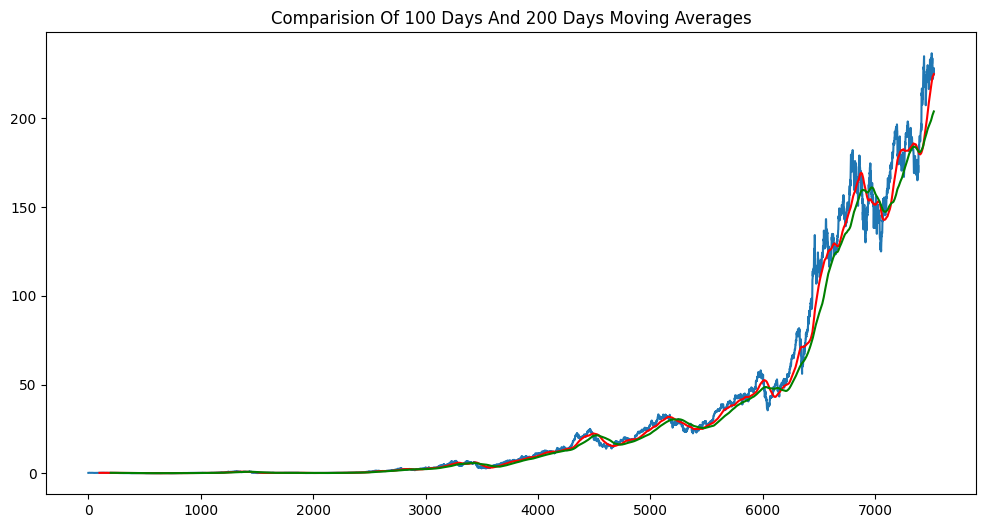

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mav100, 'r')
plt.plot(mav200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [30]:
df.shape

(7522, 7)

## Spliting the dataset into training (70%) and testing (30%) set

In [31]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data) * 0.70)])
test = pd.DataFrame(data[int(len(data) * 0.70): int(len(data))])

print(train.shape)
print(test.shape)

(5265, 7)
(2257, 7)


In [32]:
train

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,1995-01-03 00:00:00+00:00,0.285766,0.342634,0.347098,0.338170,0.347098,103868800
1,1995-01-04 00:00:00+00:00,0.293213,0.351563,0.353795,0.344866,0.344866,158681600
2,1995-01-05 00:00:00+00:00,0.289489,0.347098,0.351563,0.345982,0.350446,73640000
3,1995-01-06 00:00:00+00:00,0.312760,0.375000,0.385045,0.367188,0.371652,1076622400
4,1995-01-09 00:00:00+00:00,0.306826,0.367885,0.373884,0.366071,0.371652,274086400
...,...,...,...,...,...,...,...
5260,2015-11-20 00:00:00+00:00,27.020100,29.825001,29.980000,29.712500,29.799999,137148400
5261,2015-11-23 00:00:00+00:00,26.669035,29.437500,29.932501,29.334999,29.817499,129930000
5262,2015-11-24 00:00:00+00:00,26.924973,29.719999,29.837500,29.280001,29.332500,171212800


In [34]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
5265,2015-11-30 00:00:00+00:00,26.793613,29.575001,29.852501,29.4375,29.497499,156721200
5266,2015-12-01 00:00:00+00:00,26.576178,29.334999,29.702499,29.2150,29.687500,139409600
5267,2015-12-02 00:00:00+00:00,26.336111,29.070000,29.527500,29.0200,29.334999,133546400
5268,2015-12-03 00:00:00+00:00,26.091494,28.799999,29.197500,28.5550,29.137501,166278000
5269,2015-12-04 00:00:00+00:00,26.958946,29.757500,29.812500,28.7775,28.822500,231108000


## Using MinMax scaler for normalization of the dataset

In [33]:
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [35]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0068527 ],
       [0.00705724],
       [0.00709133],
       ...,
       [0.89094635],
       [0.89705576],
       [0.89461199]])

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
x_train.shape

(5165, 100, 1)

In [38]:
data_testing_array = scaler.fit_transform(test_close)
x_test = []
y_test = []

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100: i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

x_test.shape

(2157, 100, 1)

## Model Used - LSTM

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 30)

Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - MAE: 0.1002 - loss: 0.0288 - val_MAE: 0.0644 - val_loss: 0.0076
Epoch 2/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 80s 285ms/step - MAE: 0.0356 - loss: 0.0040 - val_MAE: 0.0752 - val_loss: 0.0087
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - MAE: 0.0312 - loss: 0.0031 - val_MAE: 0.0401 - val_loss: 0.0027
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 84s 291ms/step - MAE: 0.0323 - loss: 0.0032 - val_MAE: 0.0445 - val_loss: 0.0035
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 79s 276ms/step - MAE: 0.0325 - loss: 0.0032 - val_MAE: 0.0657 - val_loss: 0.0066
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 84s 286ms/step - MAE: 0.0342 - loss: 0.0033 - val_MAE: 0.0427 - val_loss: 0.0036
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 80s 274ms/step - MAE: 0.0307 - loss: 0.0026 - val_MAE: 0.0371 - val_loss: 0.0027
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 84s 285ms/step - MAE: 0.0299 - loss: 0.0026 - val_MAE: 0.0241 - val_loss: 0.0010
Epoch 9/30
162/162 ━━━━━━━━━━━━━

In [42]:
model.save('keras_model.h5')

In [43]:
test_close.shape

(2257, 1)

In [44]:
past_100_days = pd.DataFrame(train_close[-100:])

In [45]:
test_df = pd.DataFrame(test_close)

#### Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.

In [46]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [47]:
final_df.head()

,0
0,29.8050
1,30.3025
2,31.0800
3,31.2600
4,31.3950


In [48]:
input_data = scaler.fit_transform(final_df)

In [49]:
input_data.shape

(2357, 1)

## Model Testing

In [50]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2257, 100, 1)
(2257,)


## Making prediction and plotting the graph of predicted vs actual values

In [52]:
# Making predictions

y_pred = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step


In [53]:
y_pred.shape

(2257, 1)

In [54]:
y_test

array([0.03333608, 0.03228696, 0.03136751, ..., 0.94487993, 0.95544188,
       0.95199985])

In [55]:
scaler.scale_

array([0.00471515])

In [56]:
scale_factor = 1/0.00910747
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

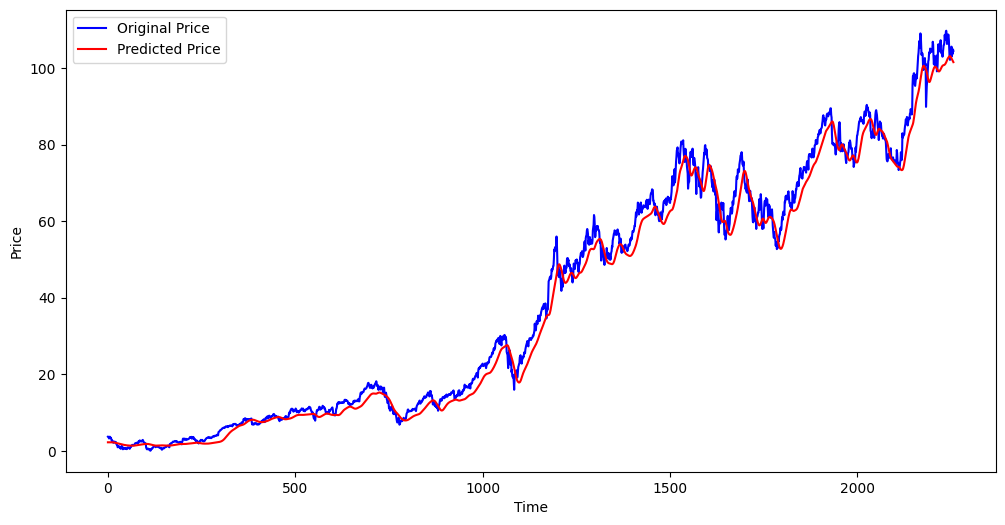

In [57]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  2.7968814583472787


In [59]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared score (Accuracy) on test set: ", r2)

R-squared score (Accuracy) on test set:  0.9873452197616456
